### Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.kernel_approximation import PolynomialCountSketch

### Configurações gerais

In [2]:
# Paleta de cor
cmap = plt.cm.Set3
# Valor de gamma
gamma = 0.01

### Gerando dados aleatórios - Toy data

In [3]:
## Não funciona bem com esse kernel - Teste
#X, y = make_moons(n_samples=500, noise=0.08)

iris = load_iris()
X = iris.data[:, 2:] # Pegando as duas primeiras características
y = iris.target

### Plotando as amostras como pontos em um gráfico bidimensional

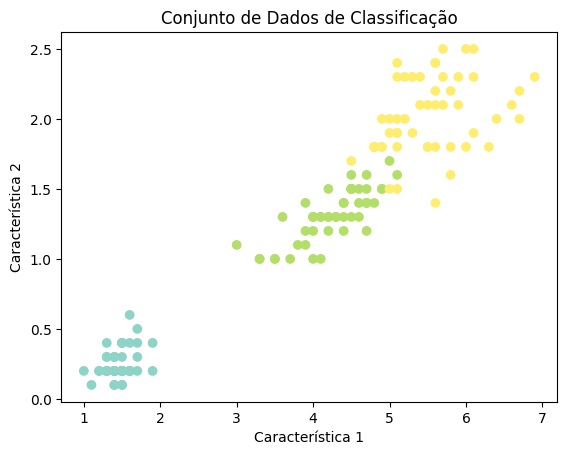

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Dados de Classificação')
plt.show()

### Pre-processamento

In [5]:
# Escalando os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Kernel Sigmoid

In [6]:
# Criando o modelo SVM com kernel sigmoid
poly_kernel = SVC(kernel='sigmoid', gamma=gamma)

In [7]:
# Treinando o modelo
poly_kernel.fit(X, y)

SVC(gamma=0.01, kernel='sigmoid')

### Visualizando fronteira de decisão

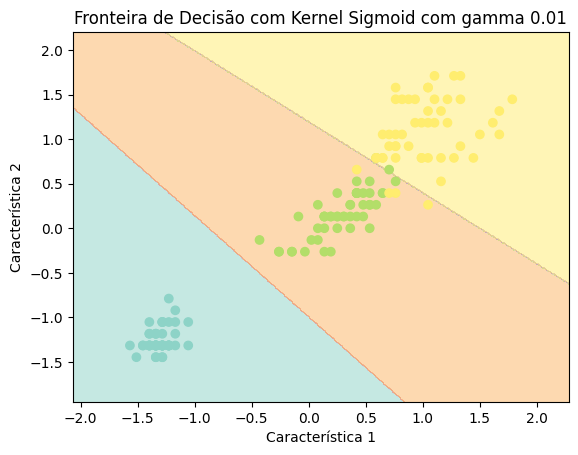

In [8]:
# Definindo os limites do gráfico
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# Criando uma malha de pontos para avaliar a fronteira de decisão
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = poly_kernel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando a fronteira de decisão e os pontos de dados
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title(f'Fronteira de Decisão com Kernel Sigmoid com gamma {gamma}')
plt.show()

### Kernel sigmoid - NumPy

In [9]:
def sigmoid_kernel(X, Y, alpha=1, c=0):
    """
    Calcula o kernel sigmoid entre as matrizes X e Y com os hiperparâmetros alpha e c.
    
    Args:
    X: array-like, matriz de m amostras e n recursos.
    Y: array-like, matriz de k amostras e n recursos.
    alpha: float, hiperparâmetro para ajustar a forma da função. Padrão é 1.
    c: float, hiperparâmetro para ajustar a posição da função. Padrão é 0.
    
    Returns:
    K: matriz de tamanho m x k contendo o resultado do kernel sigmoid.
    """
    return np.tanh(alpha * np.dot(X, Y.T) + c)